In [1]:
from NeuralNetwork import *
    # ANN, split_dataset
from Perceptron import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

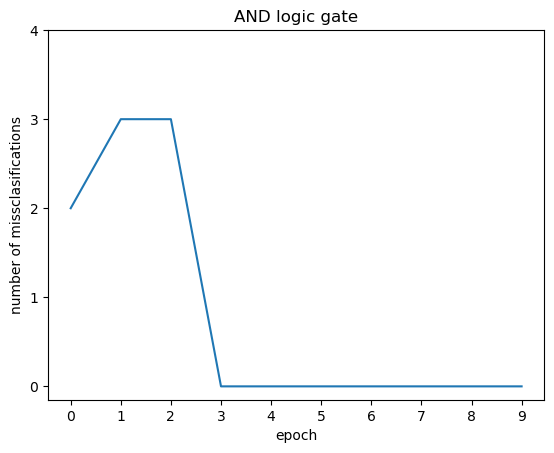

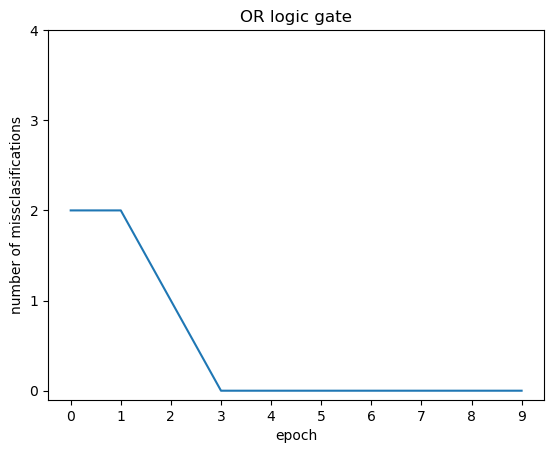

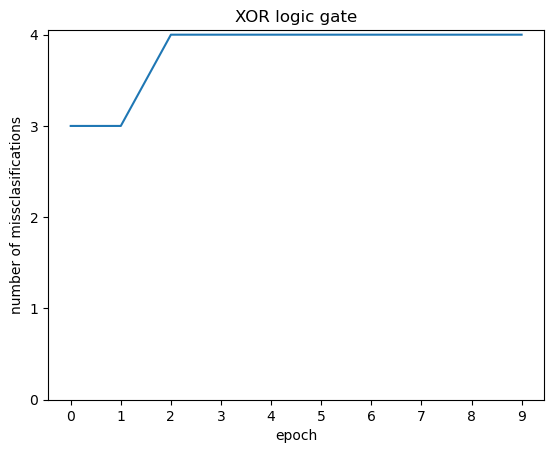

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
#load the data into numpy arrays

def vectorize_target(y, num_classes):
    """
    Local function to vectorize a specific target
    :param y: target to vectorize
    :return: vectorized target
    """
    v_y = np.zeros((num_classes, 1))
    v_y[y - 1] = 1.0
    return v_y

with open("../data/features.txt") as file:
    features = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]

with open("../data/targets.txt") as file:
    targets = [vectorize_target(int(line.rstrip('\n')), 7) for line in file]

with open("../data/unknown.txt") as file:
    unknown = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1)) for line in file]


In [6]:
# split the data into train, test data 
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

In [7]:
# # Create the network with one hidden layer
#     network = Network([10, 30, 7])
#     # set to the data to which we are learning to 'data' because we are testing
#     # it on the unknown dataset and start training
#     network.train(training_data, 35, 20, 0.07, validation_data)

#     accuracy = network.evaluate(test_data)
#     print(f"accuracy= {accuracy}")


In [8]:
# initialize the network with 10 features, 30 neurons in the hidden layer, 7 neurons in the output layer, learning rate of 0.15, squared loss function, batch size of 64
ann = ANN([10, 30, 7], lr = 0.09, loss_function="square", number_of_features = 10, batch_size=64)



In [9]:
# fit the network to the data with 35 epochs
# baches of 20, learning rate of 0.07
ann.fit(features, targets, 10)


Epoch  1  done.
Score (accuracy) for this epoch =  0.41337579617834397
Epoch  2  done.
Score (accuracy) for this epoch =  0.5496815286624204
Epoch  3  done.
Score (accuracy) for this epoch =  0.675796178343949
Epoch  4  done.
Score (accuracy) for this epoch =  0.7496815286624203
Epoch  5  done.
Score (accuracy) for this epoch =  0.7770700636942676
Epoch  6  done.
Score (accuracy) for this epoch =  0.8388535031847134
Epoch  7  done.
Score (accuracy) for this epoch =  0.8777070063694268
Epoch  8  done.
Score (accuracy) for this epoch =  0.9165605095541401
Epoch  9  done.
Score (accuracy) for this epoch =  0.9082802547770701
Epoch  10  done.
Score (accuracy) for this epoch =  0.9178343949044586


In [10]:
# evaluate the accuracy of the network on the test data

all = len(test_data)
corr = 0
for x, y in test_data:
    output = ann.forward_propagate(x)
    corr = corr + 1 if np.argmax(output) == np.argmax(y) else corr
accuracy = corr / all

print(f"accuracy= {accuracy}")


accuracy= 0.9114649681528663


In [11]:
#generate predictions for the unknown data and save them to a file called 47_classes.txt coma separated in the data folder

predictions = []
for x in unknown:
    output = ann.forward_propagate(x)
    predictions.append(np.argmax(output))
    
with open("../data/47_classes.txt", "w") as file:
    for prediction in predictions:
        file.write(str(prediction) + ",")
    file.write(str(predictions[-1]))


In [12]:
kscore_7neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 7, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_16neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 16, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)
kscore_30neurons =  kfold_cross_validation(np.array(features), np.array(targets), [10, 30, 7], learning_rate = 0.1, loss_function="square", k = 4, num_of_features = 10, batch_size=32)

cross-validation  1  /  4  step
 -  1  /  10  iterations.
Score:  0.8303616912888436
 -  2  /  10  iterations.
Score:  0.8869077941925624
 -  3  /  10  iterations.
Score:  0.45491594498217014
 -  4  /  10  iterations.
Score:  0.41365257259296995
 -  5  /  10  iterations.
Score:  0.6816097809475293
 -  6  /  10  iterations.
Score:  0.41365257259296995
 -  7  /  10  iterations.
Score:  0.3790117167600611
 -  8  /  10  iterations.
Score:  0.35812531839021905
 -  9  /  10  iterations.
Score:  0.8140601120733572
 -  10  /  10  iterations.
Score:  0.7926642893530311
cross-validation  2  /  4  step
 -  1  /  10  iterations.
Score:  0.5394803871625063
 -  2  /  10  iterations.
Score:  0.45389709628120223
 -  3  /  10  iterations.
Score:  0.6245542536933265
 -  4  /  10  iterations.
Score:  0.8140601120733572
 -  5  /  10  iterations.
Score:  0.8099847172694855
 -  6  /  10  iterations.
Score:  0.7967396841569027
 -  7  /  10  iterations.
Score:  0.8736627610799796
 -  8  /  10  iterations.
Sco

In [13]:
print("Scores with 7 neurons: ", kscore_7neurons)
print("Scores with 16 neurons: ", kscore_16neurons)
print("Scores with 30 neurons: ", kscore_30neurons)
scores = [kscore_7neurons, kscore_16neurons, kscore_30neurons]
neurons = ["7", "16", "30"]
cross_validation_score = []
for x in scores:
    temp = []
    for tab in x:
        avg1 = np.mean(tab)
        temp.append(avg1)
    cross_validation_score.append(np.mean(temp))
print("---")
print(cross_validation_score)

Scores with 7 neurons:  [[0.8303616912888436, 0.8869077941925624, 0.45491594498217014, 0.41365257259296995, 0.6816097809475293, 0.41365257259296995, 0.3790117167600611, 0.35812531839021905, 0.8140601120733572, 0.7926642893530311], [0.5394803871625063, 0.45389709628120223, 0.6245542536933265, 0.8140601120733572, 0.8099847172694855, 0.7967396841569027, 0.8736627610799796, 0.6902699949057565, 0.2628629648497198, 0.7941925624044829], [0.826286296484972, 0.8675496688741722, 0.7152317880794702, 0.8711156393275599, 0.8003056546102904, 0.869077941925624, 0.4956698930208864, 0.5160468670402445, 0.5547631176770249, 0.6607233825776873], [0.7289862455425369, 0.8461538461538461, 0.2042791645440652, 0.782985226693836, 0.5425369332654101, 0.5639327559857361, 0.6403464085583291, 0.7396841569027, 0.5690269994905757, 0.478349465104432]]
Scores with 16 neurons:  [[0.8940397350993378, 0.8920020376974019, 0.9062659195109526, 0.8950585838003057, 0.9235863474274071, 0.9062659195109526, 0.8981151299032094, 0.

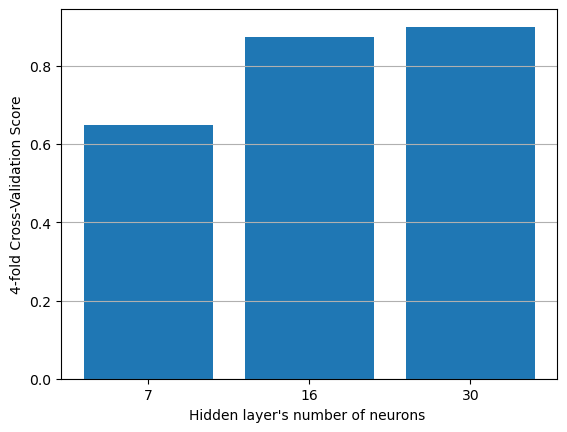

In [14]:
plt.bar(neurons, cross_validation_score)
plt.ylabel("4-fold Cross-Validation Score")
plt.xlabel("Hidden layer's number of neurons ")
plt.grid(axis = 'y')
plt.show()

In [15]:
# split the data into train, test and val data
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

best_model = ANN([10, 30, 7], lr = 0.13, loss_function="square", number_of_features = 10, batch_size=64)

best_model.fit_train_val(train_data, test_data, 30)
val_score_by_epoch = best_model.epoch_score[0]
train_score_by_epoch = best_model.epoch_score[1]
epochs = np.arange(31)[1:]

Epoch  1  done.
Score (accuracy) for this epoch on train:  0.19143857415658816 , on validation:  0.19681528662420383
Epoch  2  done.
Score (accuracy) for this epoch on train:  0.5437619350732018 , on validation:  0.5331210191082802
Epoch  3  done.
Score (accuracy) for this epoch on train:  0.7457033736473584 , on validation:  0.7394904458598726
Epoch  4  done.
Score (accuracy) for this epoch on train:  0.8287714831317632 , on validation:  0.8210191082802548
Epoch  5  done.
Score (accuracy) for this epoch on train:  0.8854232972628899 , on validation:  0.8904458598726115
Epoch  6  done.
Score (accuracy) for this epoch on train:  0.8820814767663908 , on validation:  0.8878980891719745
Epoch  7  done.
Score (accuracy) for this epoch on train:  0.8828771483131763 , on validation:  0.8923566878980892
Epoch  8  done.
Score (accuracy) for this epoch on train:  0.9062698917886697 , on validation:  0.9057324840764331
Epoch  9  done.
Score (accuracy) for this epoch on train:  0.9202737110120942 

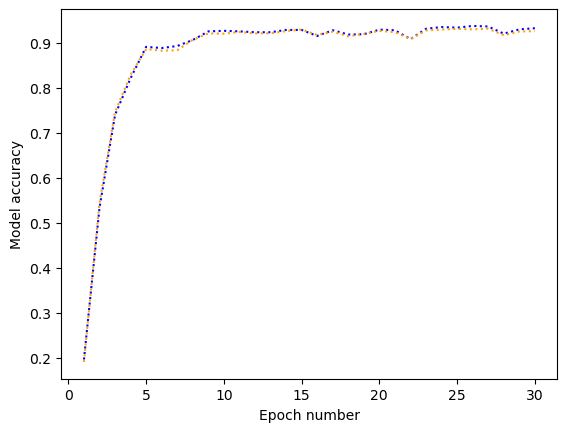

In [16]:
plt.plot(epochs, val_score_by_epoch, c="blue", ls=":")
plt.plot(epochs, train_score_by_epoch, c="orange", ls=":")
plt.xlabel("Epoch number")
plt.ylabel("Model accuracy")
plt.show()

In [17]:
print(epochs)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
